In [1]:
from PIL import Image
from matplotlib import pyplot as plt
from collections import Counter
from scipy import ndimage as ndi
from skimage import feature
import scipy.misc
import numpy as np
import statistics
import random
import scipy

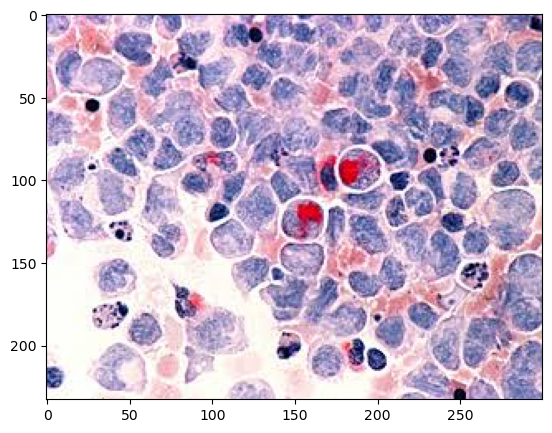

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize']=[10,5]


img_cancerbgr=cv2.imread('cancer.jpg')#imagen trabajada
img_cancerrbg=plt.imread('cancer.jpg')

imagen=cv2.cvtColor(img_cancerbgr,cv2.COLOR_BGR2RGB)
plt.imshow(imagen)

plt.show()


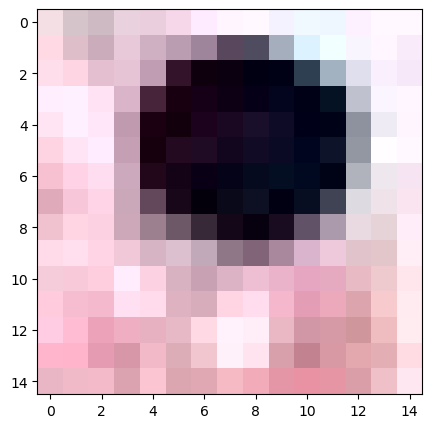

In [9]:
plt.imshow(imagen[50:65,20:35,:])#identificar por x,y y color rgb

plt.show()



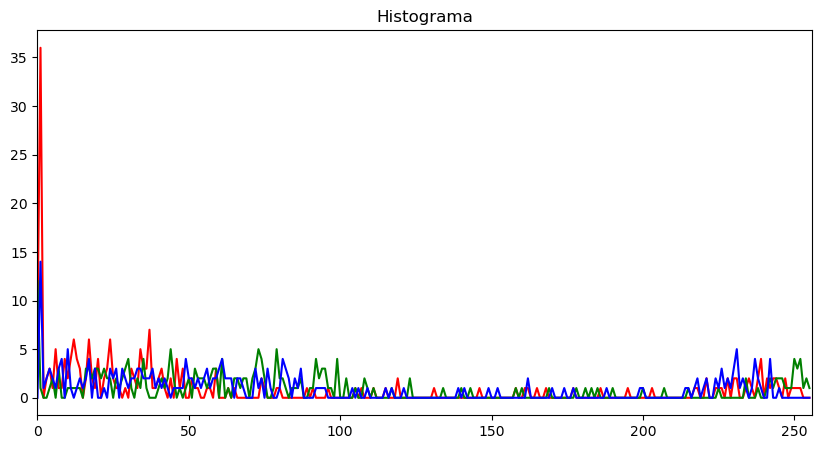

In [12]:
# plt.imshow(imagen[50:65,20:35,:])
# plt.show()

celula_cancer=imagen[50:65,20:35,:]
plt.imsave('celula_cancer.jpg',celula_cancer)
celula=plt.imread('celula_cancer.jpg')
color= ('r','g','b')
for canal, col in enumerate(color):
    histograma=cv2.calcHist([celula*255],[canal],None,[256],[0,256])
    plt.plot(histograma,color=col)
    plt.xlim([0,256])

plt.title('Histograma')
plt.show()

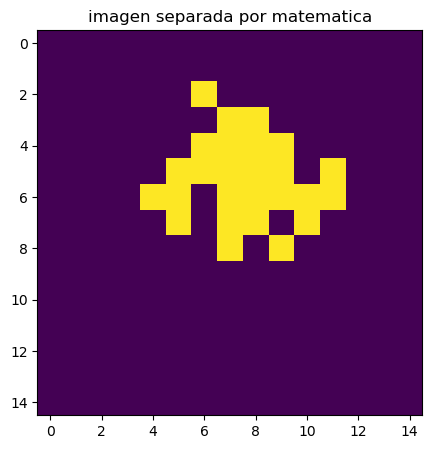

In [20]:
r_celula=celula[:,:,0]*255
g_celula=celula[:,:,1]*255
b_celula=celula[:,:,2]*255

r_celula=r_celula>200
g_celula=g_celula>100
b_celula=b_celula>200

#convertir array bidimensional
img_final=np.array(r_celula*g_celula*b_celula*255,dtype=int)

plt.imshow(img_final)
plt.title('imagen separada por matematica')
plt.show()

solarizacion y posterizacion
clase 19_03_24 - 20_03_24

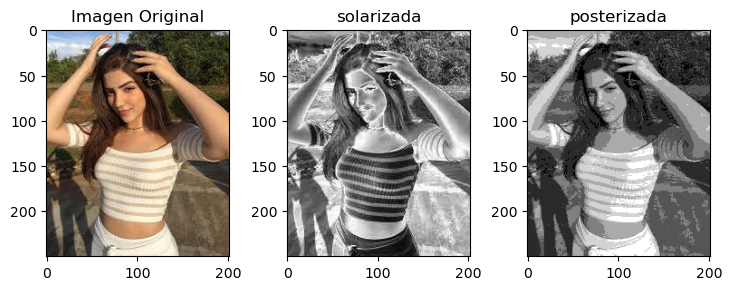

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def solarizar(image,umbral):
    img_solarizada=np.where(image<umbral,image,255-image)
    return img_solarizada

def posterizar(image,nivel):
    f_nvl=255/nivel
    img_poster=np.round(image/f_nvl)*f_nvl
    return img_poster.astype(np.uint8)


imagen=cv2.imread('girl1.jpg')
img_cris=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY) 
umbral=127
img_solarizada=solarizar(img_cris,umbral)

#################################
nivel=6
img_posterizada=posterizar(img_cris,nivel)
#################################
plt.figure(figsize=(15, 10))

plt.subplot(3, 5, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")

plt.subplot(3,5,2)
plt.imshow(img_solarizada, cmap='gray')
plt.title('solarizada')

plt.subplot(3,5,3)
plt.imshow(img_posterizada, cmap='gray')
plt.title('posterizada')

plt.show()




practica: 19_03_24
realiza un pequeño script que permita visualizar una lista de paleta de colores disponibles en opencv a través de un ciclo pepetitivo.

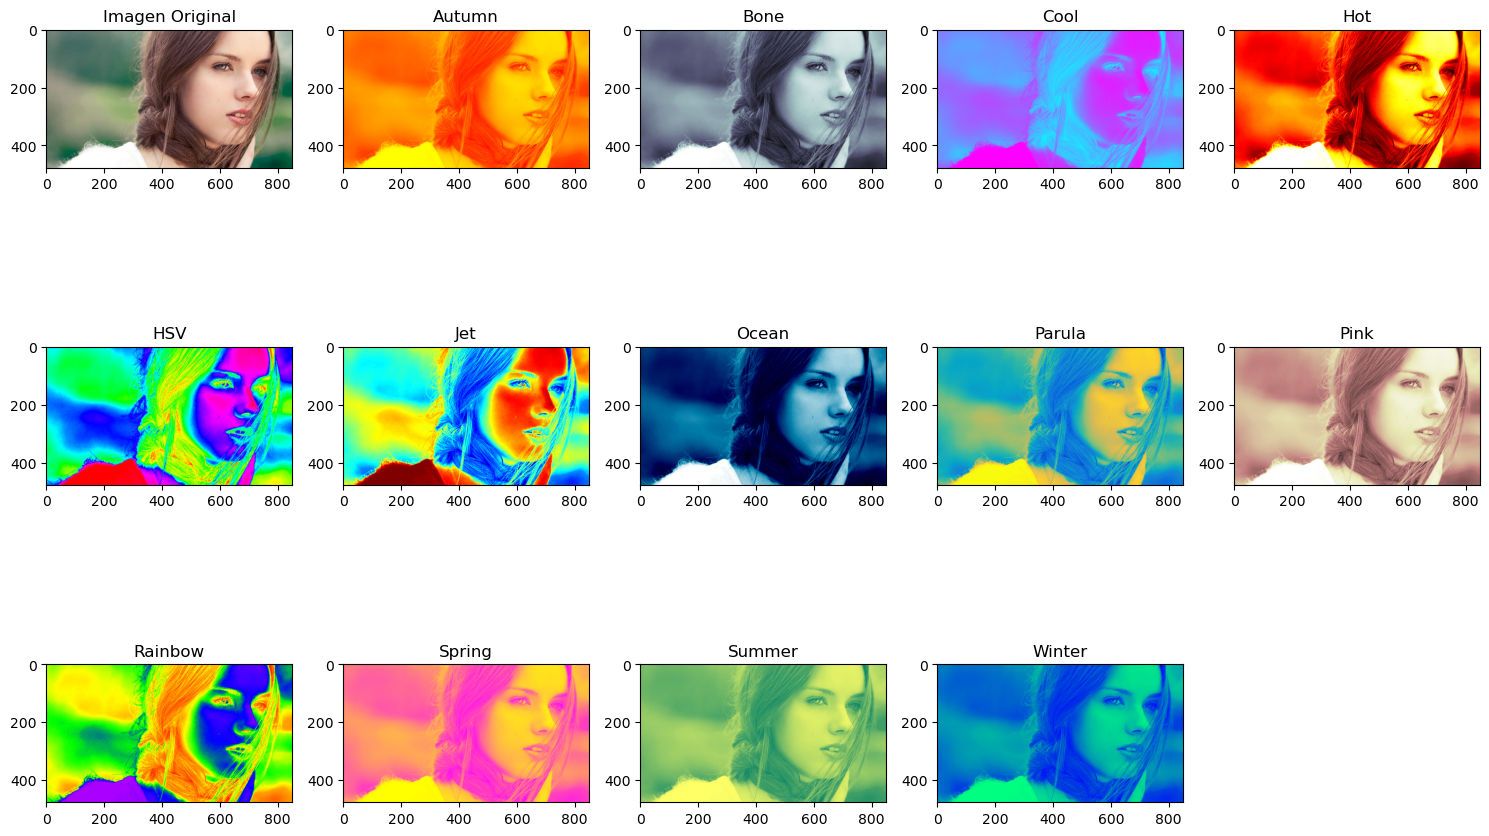

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

paletas = [cv2.COLORMAP_AUTUMN, cv2.COLORMAP_BONE, cv2.COLORMAP_COOL,
           cv2.COLORMAP_HOT, cv2.COLORMAP_HSV, cv2.COLORMAP_JET,
           cv2.COLORMAP_OCEAN, cv2.COLORMAP_PARULA, cv2.COLORMAP_PINK,
           cv2.COLORMAP_RAINBOW, cv2.COLORMAP_SPRING, cv2.COLORMAP_SUMMER,
           cv2.COLORMAP_WINTER]


nome_paletas = ["Autumn", "Bone", "Cool", "Hot", "HSV", "Jet", "Ocean", 
                   "Parula", "Pink", "Rainbow", "Spring", "Summer", "Winter"]


imagen = cv2.imread("girl.jpg")


plt.figure(figsize=(15, 10))
plt.subplot(3, 5, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")


for i, paleta in enumerate(paletas):
    
    imagen_paleta = cv2.applyColorMap(imagen, paleta)    
    plt.subplot(3, 5, i+2)
    plt.imshow(cv2.cvtColor(imagen_paleta, cv2.COLOR_BGR2RGB))
    plt.title(nome_paletas[i])
plt.tight_layout()
plt.show()

clase: 20_03_24

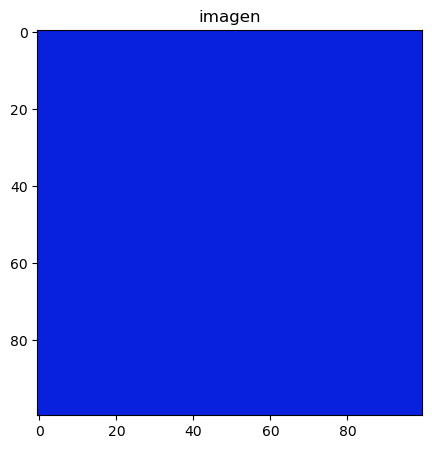

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=[10,5]
tamanio_img=100
R=np.ones((tamanio_img,tamanio_img))*7
G=np.ones((tamanio_img,tamanio_img))*33
B=np.ones((tamanio_img,tamanio_img))*223

imagen=np.dstack((R,G,B))
imagen=np.array(imagen,dtype=int)

plt.figure()
plt.imshow(imagen)
plt.title('imagen')

plt.show()



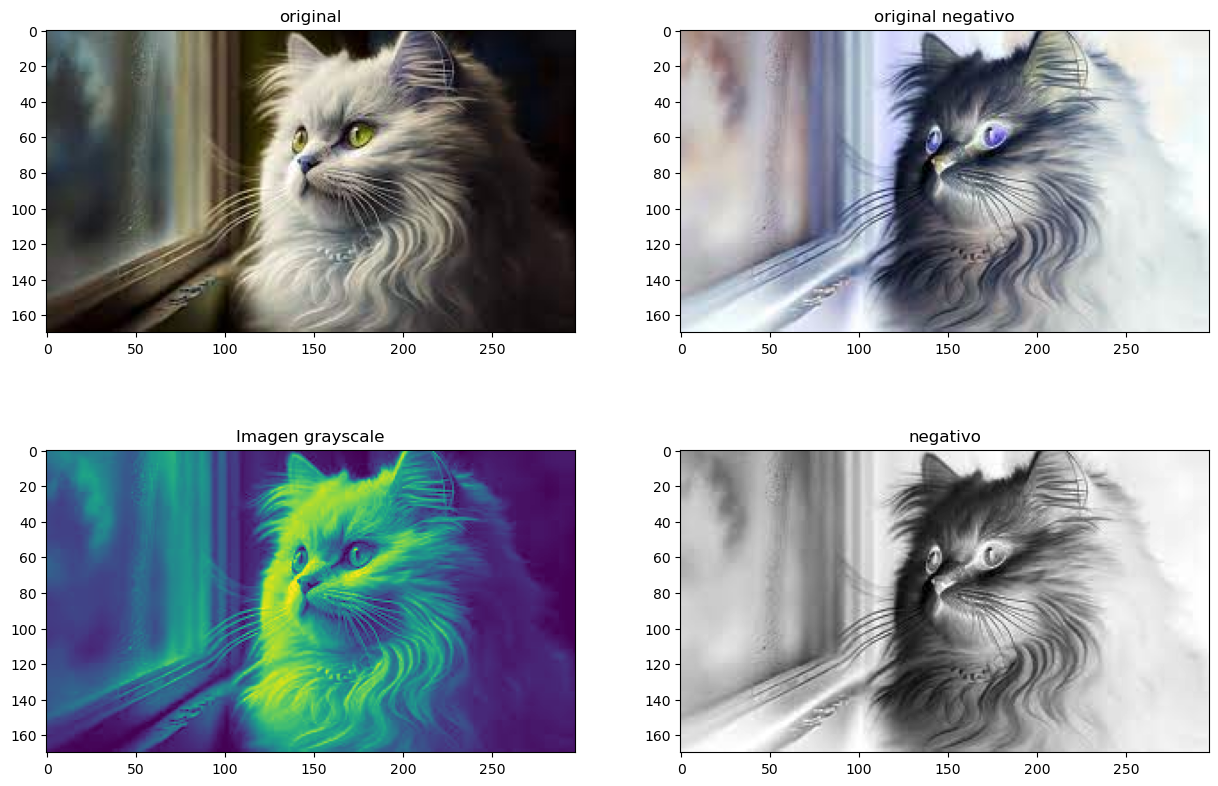

In [1]:
import cv2 
import matplotlib.pyplot as plt




img_cris=cv2.imread('gatin.jfif', cv2.IMREAD_GRAYSCALE)
imagen_color=cv2.imread('gatin.jfif', cv2.COLOR_BGR2RGB)
negativo_cris=255-img_cris
negativo_imagen_color=255-imagen_color



plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
plt.imshow(imagen_color)
plt.title('original')

plt.subplot(2,2,2)
plt.imshow(negativo_imagen_color)
plt.title('original negativo')

plt.subplot(2, 2, 3)
plt.imshow(img_cris)
plt.title("Imagen grayscale")

plt.subplot(2,2,4)
plt.imshow(negativo_cris, cmap='gray')
plt.title('negativo')

plt.show()


clase 21_03_24

contraste

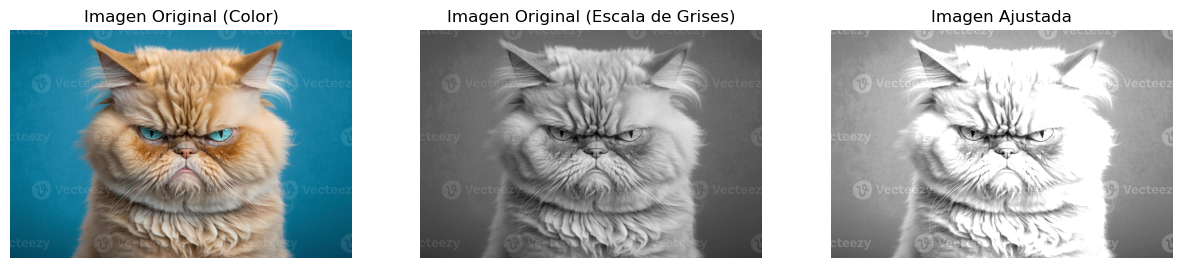

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def contraste(imagen, a=1.0, b=0):
    img_nueva = np.clip(a * imagen + b, 0, 255).astype(np.uint8)
    return img_nueva

imagen = cv2.imread('cat.jpg')

# Convertir la imagen a escala de grises
imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Aplicar ajuste de contraste
imagen_ajustada = contraste(imagen_gris, a=1.5, b=20)  # Puedes ajustar 'a' y 'b' según sea necesario

# Mostrar las imágenes original y ajustada
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original (Color)')

plt.subplot(1, 3, 2)
plt.imshow(imagen_gris, cmap='gray')
plt.title('Imagen Original (Escala de Grises)')

plt.subplot(1, 3, 3)
plt.imshow(imagen_ajustada, cmap='gray')
plt.title('Imagen Ajustada')

plt.show()


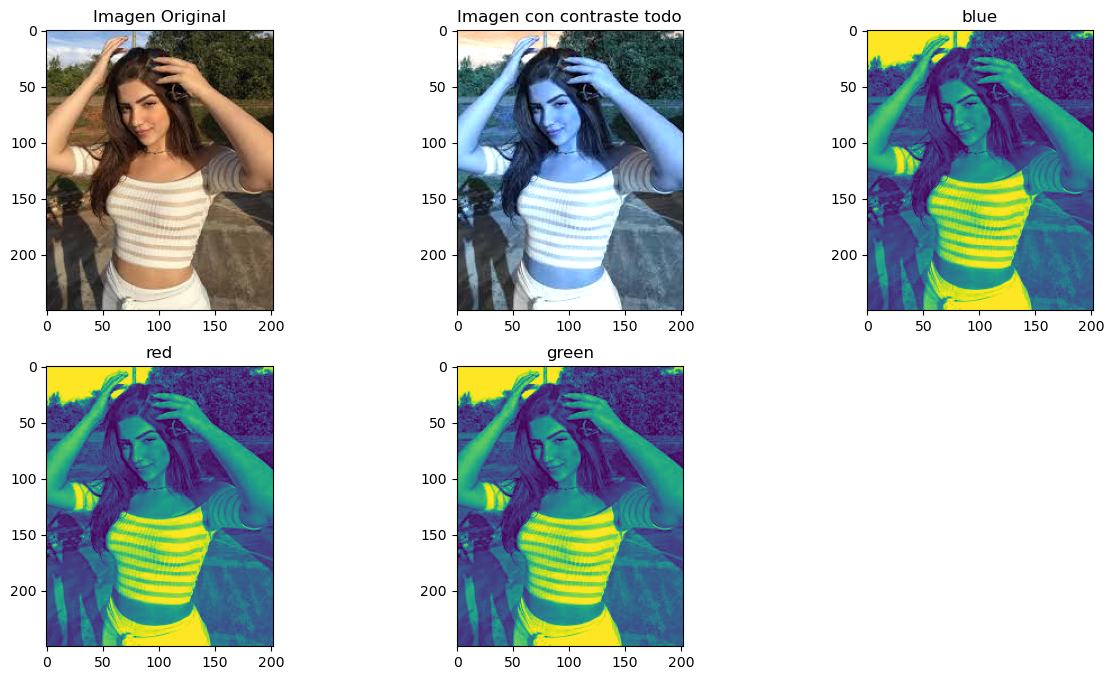

In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def contraste_color(imagen, a, b):
    img_nueva = cv2.convertScaleAbs(imagen, alpha=a, beta=b)
    return img_nueva

imagen = cv2.imread('girl1.jpg')
img_original=cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
blue, green, red = cv2.split(imagen)

contraste_blue = contraste_color(blue, a=1.2, b=1)
contraste_green = contraste_color(green, a=1.2, b=1)
contraste_red = contraste_color(red, a=1.2, b=1)

imagen_final = cv2.merge((contraste_blue, contraste_green, contraste_red))

# Mostrar las imágenes original y ajustada
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Imagen Original')

plt.subplot(2, 3, 2)
plt.imshow(imagen_final,cmap='gray'  )
plt.title('Imagen con contraste todo')

plt.subplot(2, 3, 3)
plt.imshow(contraste_blue )
plt.title('blue')


plt.subplot(2, 3, 4)
plt.imshow(contraste_blue  )
plt.title('red')

plt.subplot(2, 3, 5)
plt.imshow(contraste_blue )
plt.title('green')

plt.show()


Actividad Practica teorica:

investiga los algoritmis de aumento de brillo de un imagen y aplicalos en una imagen haciendo uso de python y jupiter

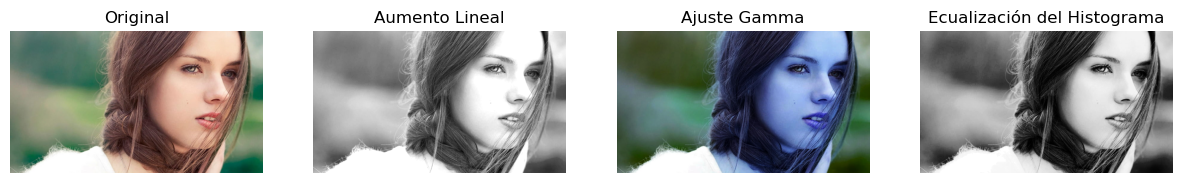

In [41]:


import cv2
import matplotlib.pyplot as plt
import numpy as np

def aumentar_brillo_lineal(imagen, aumento):
    # Convertir la imagen a escala de grises
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    # Añadir el aumento a todos los píxeles
    nueva_imagen = cv2.add(imagen_gris, aumento)
    return nueva_imagen

def ajuste_gamma(imagen, gamma=1.0):
    # Normalizar los valores de píxeles entre 0 y 1
    imagen_normalizada = imagen / 255.0
    # Aplicar la transformación gamma
    nueva_imagen = np.power(imagen_normalizada, gamma)
    # Escalar nuevamente los valores a [0, 255]
    nueva_imagen = np.uint8(nueva_imagen * 255)
    return nueva_imagen

# Cargar la imagen
imagen = cv2.imread('girl.jpg')

# Aumento lineal
imagen_aumentada_lineal = aumentar_brillo_lineal(imagen, aumento=50)

# Ajuste gamma
imagen_ajuste_gamma = ajuste_gamma(imagen, gamma=1.5)

# Ecualización del histograma
imagen_ecualizada = cv2.equalizeHist(cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY))

# Mostrar las imágenes
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(imagen_aumentada_lineal, cmap='gray')
plt.title('Aumento Lineal')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(imagen_ajuste_gamma, cmap='gray')
plt.title('Ajuste Gamma')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(imagen_ecualizada, cmap='gray')
plt.title('Ecualización del Histograma')
plt.axis('off')

plt.show()


Actividad Practica teorica:

investiga los algoritmis de aumento de brillo de un imagen y aplicalos en una imagen haciendo uso de python y jupiter

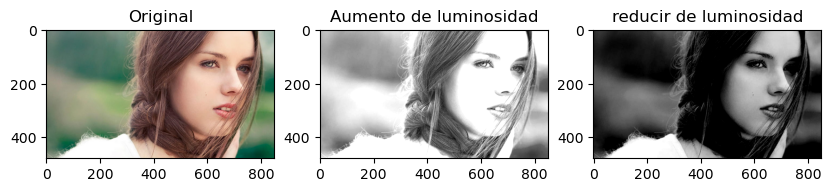

In [2]:

import cv2
import matplotlib.pyplot as plt
import numpy as np

def aumentar_luminosidad(imagen, aumento):
    # Convertir la imagen a escala de grises
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    # Aumentar la luminosidad multiplicando cada píxel por el aumento
    nueva_imagen = cv2.addWeighted(imagen_gris, 1, np.zeros(imagen_gris.shape, imagen_gris.dtype), 0, aumento)
    return nueva_imagen

# Cargar la imagen
imagen = cv2.imread('girl.jpg')

# Aumentar la luminosidad
imagen_aumentada = aumentar_luminosidad(imagen, aumento=90)
imagen_reducida = aumentar_luminosidad(imagen, aumento=-90)

# Mostrar las imágenes
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(imagen_aumentada, cmap='gray')
plt.title('Aumento de luminosidad')

plt.subplot(1, 3, 3)
plt.imshow(imagen_reducida, cmap='gray')
plt.title('reducir de luminosidad')

plt.show()

